In [1]:
#Import libraries to work with
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
data = pd.read_csv('~/data(1).csv')

#Display the first few rows of the dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#Shape of the dataset
print("*************************************")
print("Shape of the dataset:", data.shape)
print("*************************************")

#Check for missing values
print("*************************************")
print("Missing values:\n", data.isnull().sum())
print("*************************************")

#Statistics for the amount column
print("***************************************")
print("Basic statistics for the amount column:\n", data['amount'].describe())
print("***************************************")

*************************************
Shape of the dataset: (6362620, 11)
*************************************
*************************************
Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
*************************************
***************************************
Basic statistics for the amount column:
 count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64
***************************************


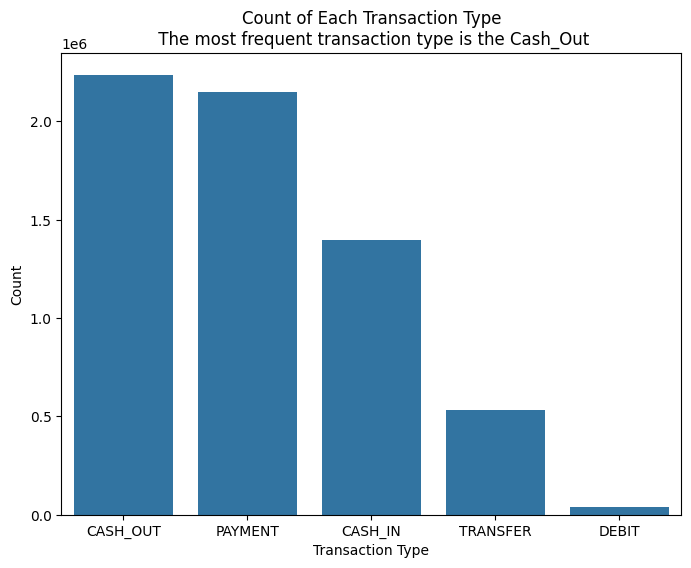

In [18]:
#Visualizing Transaction Types
#By plotting a bar graph showing the count of each transaction type.

transaction_counts = data['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Each Transaction Type\n The most frequent transaction type is the Cash_Out')
plt.show()

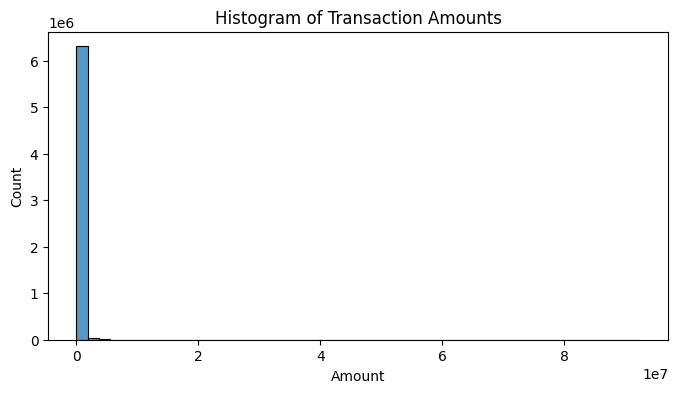

In [27]:
# Histogram of the transaction amounts

#Adjust the number of bins as needed This means the range of transaction amounts will be divided into 50 equally sized intervals, 
#and the histogram will display the frequency or count of transactions falling within each interval.

plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='amount', bins=50)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Histogram of Transaction Amounts')
plt.show()

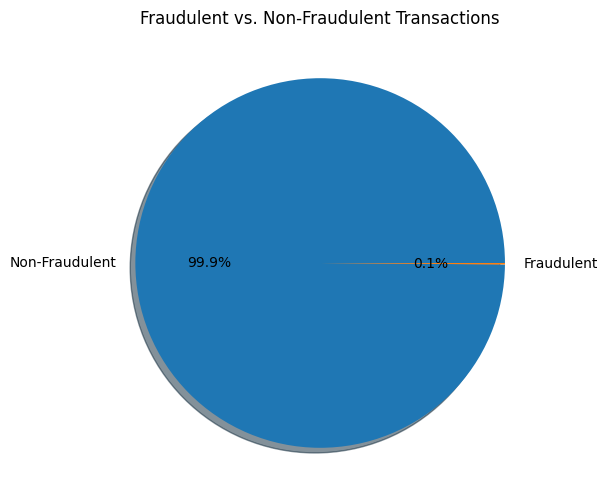

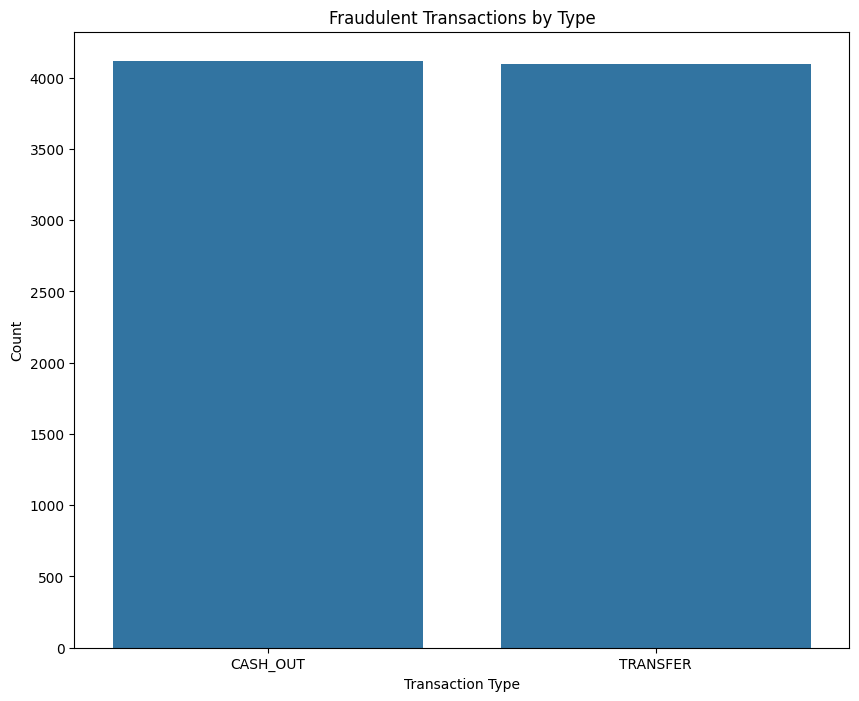

In [29]:
# Fraud Analysis
# Pie chart for fraudulent vs. non-fraudulent transactions
fraud_counts = data['isFraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', shadow=True)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

# Bar graph of fraudulent transactions by type
fraud_by_type = data[data['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Type')
plt.show()

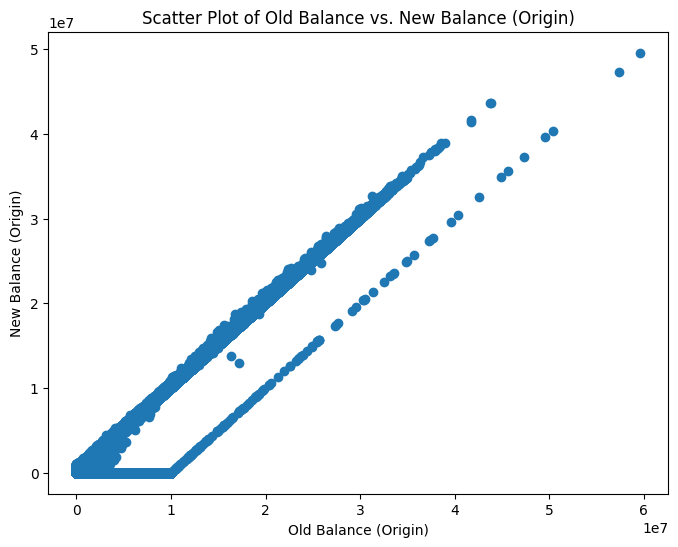

In [30]:
# Balance Analysis
# Scatter plot for oldbalanceOrg vs. newbalanceOrig
plt.figure(figsize=(8, 6))
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'])
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.title('Scatter Plot of Old Balance vs. New Balance (Origin)')
plt.show()

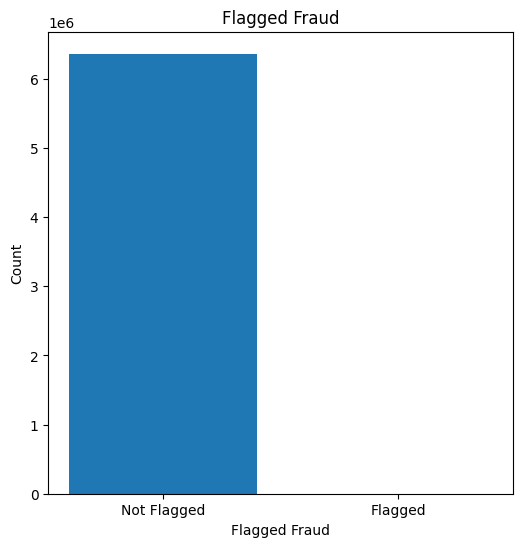

In [31]:
# Flagged Fraud Analysis
# Bar chart for flagged fraud
flagged_fraud_counts = data['isFlaggedFraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(['Not Flagged', 'Flagged'], flagged_fraud_counts)
plt.xlabel('Flagged Fraud')
plt.ylabel('Count')
plt.title('Flagged Fraud')
plt.show()